In [11]:
# please make sure the following dependencies are already installed on your local machine
import pandas as pd         
import matplotlib.pyplot as plt
import numpy as np

# please decompress the zip files in the citibike folder before running the code
citibike2022 = pd.read_csv('../data/citibike/CitiBikeJanToDec2022.csv')
citibike2019 = pd.read_csv('../data/citibike/CitiBikeJanToDec2019.csv')

In [12]:
# number of rows and cols in the citibike2022 DataFrame
print(citibike2022.shape)

# number of rows and cols in the citibike2019 DataFrame
print(citibike2019.shape)

(895485, 13)
(404947, 15)


In [13]:
# create a new column 'startdate' by extracting only the date information from the 'started_at' of each entry
citibike2022['startdate'] = citibike2022['started_at'].str[:10]

# examine the first 5 entries of the updated citibike2022 DataFrame, we can see that the new column
# 'startdate' has already been created
citibike2022.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,startdate
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13


In [14]:
# create a new column 'startdate' by extracting only the date information from the 'started_at' of each entry
citibike2019['startdate'] = citibike2019['starttime'].str[:10]

# examine the first 5 entries of the updated citibike2019 DataFrame, we can see that the new column
# 'startdate' has already been created
citibike2019.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,2019-01-01
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,2019-01-01
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,2019-01-01
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,2019-01-01
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,2019-01-01


In [15]:
# find the daily trips count of each date from the citibike2022 DataFrame
# resulting dateTripsPair2022: {'2022-01-26': 1149, '2022-01-28': 894, '2022-01-10': 859...}
dateTripsPair2022 = {}
for date in citibike2022['startdate']:
    dateTripsPair2022[date] = dateTripsPair2022.get(date, 0) + 1

# since the line graph we are going to plot requires us to have dates being in ascending sorted
# order, we need to sort the dateTripsPair2022 hashmap based on the date key
# resulting sortedDateTripsPairList: [('2022-01-01', 592), ('2022-01-02', 1248), ('2022-01-03', 832)...]
sortedDateTripsPairList2022 = sorted(dateTripsPair2022.items(), key=lambda x:x[0])

dateList2022 = []
dailyTripsCountList2022 = []

for eachPair in sortedDateTripsPairList2022:
    # date of this pair
    dateList2022.append(eachPair[0])
    
    # total trips count on this date
    dailyTripsCountList2022.append(eachPair[1])

In [16]:
# find the 7-day moving average of 2022, using numpy's rolling function
movingAvg2022 = pd.Series(dailyTripsCountList2022).rolling(window=7).mean()

# convert movingAvg2022 pandas series into list for future plotting purpose
movingAvg2022 = movingAvg2022.tolist()

In [17]:
# carry out the same operations to find the daily trips count of each date in 2019
dateTripsPair2019 = {}
for date in citibike2019['startdate']:
    dateTripsPair2019[date] = dateTripsPair2019.get(date, 0) + 1

sortedDateTripsPairList2019 = sorted(dateTripsPair2019.items(), key=lambda x:x[0])

dateList2019 = []
dailyTripsCountList2019 = []

for eachPair in sortedDateTripsPairList2019:
    dateList2019.append(eachPair[0])
    dailyTripsCountList2019.append(eachPair[1])

In [18]:
# find the 7-day moving average of 2019, using numpy's rolling function
movingAvg2019 = pd.Series(dailyTripsCountList2019).rolling(window=7).mean()

# convert movingAvg2022 pandas series into list for future plotting purpose
movingAvg2019 = movingAvg2019.tolist()

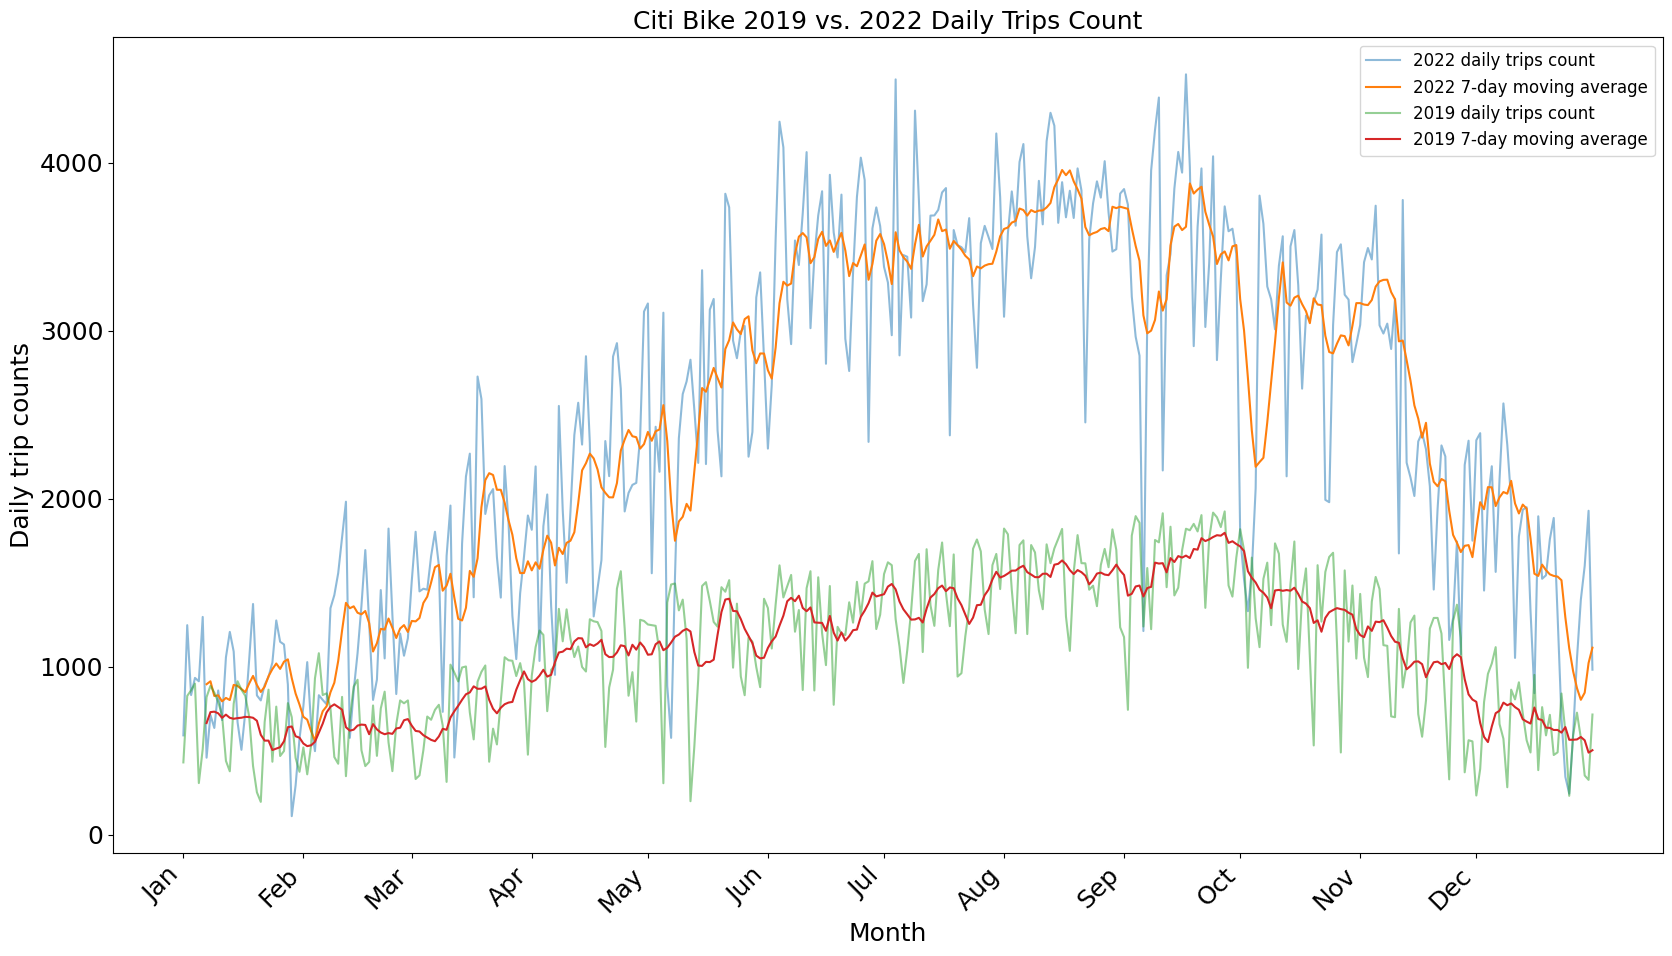

In [19]:
# set the size of the plot
plt.figure(figsize=(20, 12))

# plot data
plt.plot(dateList2022, dailyTripsCountList2022, label='2022 daily trips count', alpha=0.5)
plt.plot(dateList2022, movingAvg2022, label='2022 7-day moving average')
plt.plot(dateList2022, dailyTripsCountList2019, label='2019 daily trips count', alpha=0.5)
plt.plot(dateList2022, movingAvg2019, label='2019 7-day moving average')
plt.legend(fontsize=12)

# set plot title and axis labels
plt.title('Citi Bike 2019 vs. 2022 Daily Trips Count', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Daily trip counts', fontsize=18)

# set x-tick labels to show abbreviated month names
dateRange = pd.date_range(start=dateList2022[0], end=dateList2022[len(dateList2022) - 1])
monthStarts = [date for date in dateRange if date.day == 1]
daysSinceStartOfYear = [(date - pd.Timestamp(date.year, 1, 1)).days for date in monthStarts]
monthNames = [date.strftime('%b') for date in monthStarts]
plt.xticks(daysSinceStartOfYear, monthNames, rotation=45, ha='right', fontsize=18)

# adjust plot margins
plt.subplots_adjust(bottom=0.20)

# set yticks fontsize
plt.yticks(fontsize=18)

# show plot
plt.show()